In [1]:
import torch, timm
from utils import get_fm_csv, euc_dist, plot_closest_imgs
import pandas as pd
from model import Model
from skimage import io
import numpy as np

data_dir = "data/train/"
csv_file = "data/train.csv"
df = pd.read_csv(csv_file)
device = 'cuda'

/home/ubuntu/anaconda3/lib/python3.8/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)


In [2]:
model = Model("efficientnet_b0")
model.to(device)
model.eval()
model.load_state_dict(torch.load("best_model.pt"))
df_enc = get_fm_csv(model, data_dir, df['Anchor'], device)


Model efficientnet_b0 is successfully loaded!


100%|██████████| 4000/4000 [00:33<00:00, 118.18it/s]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/networkx/drawing/layout.py:725: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


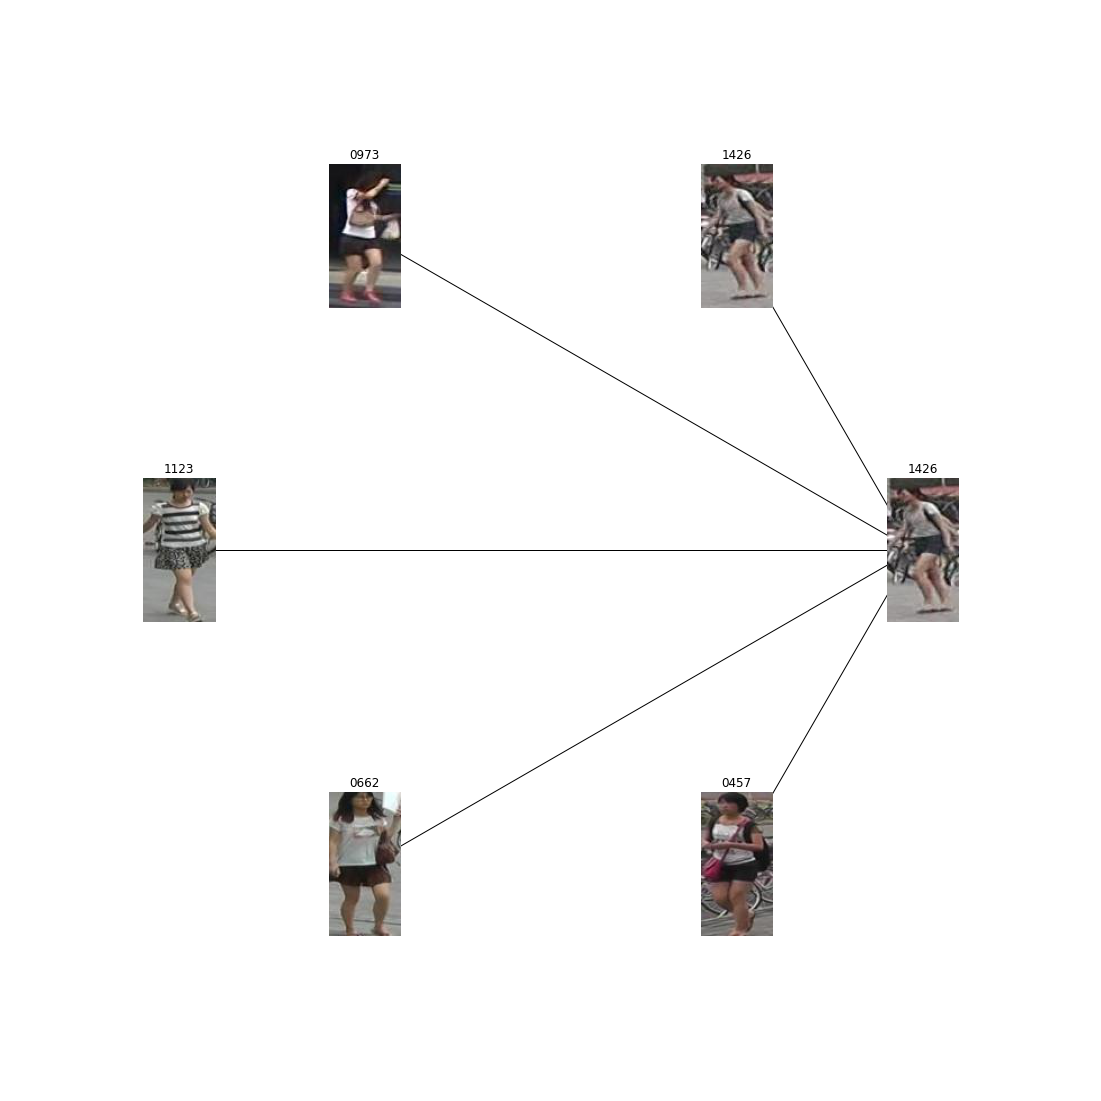

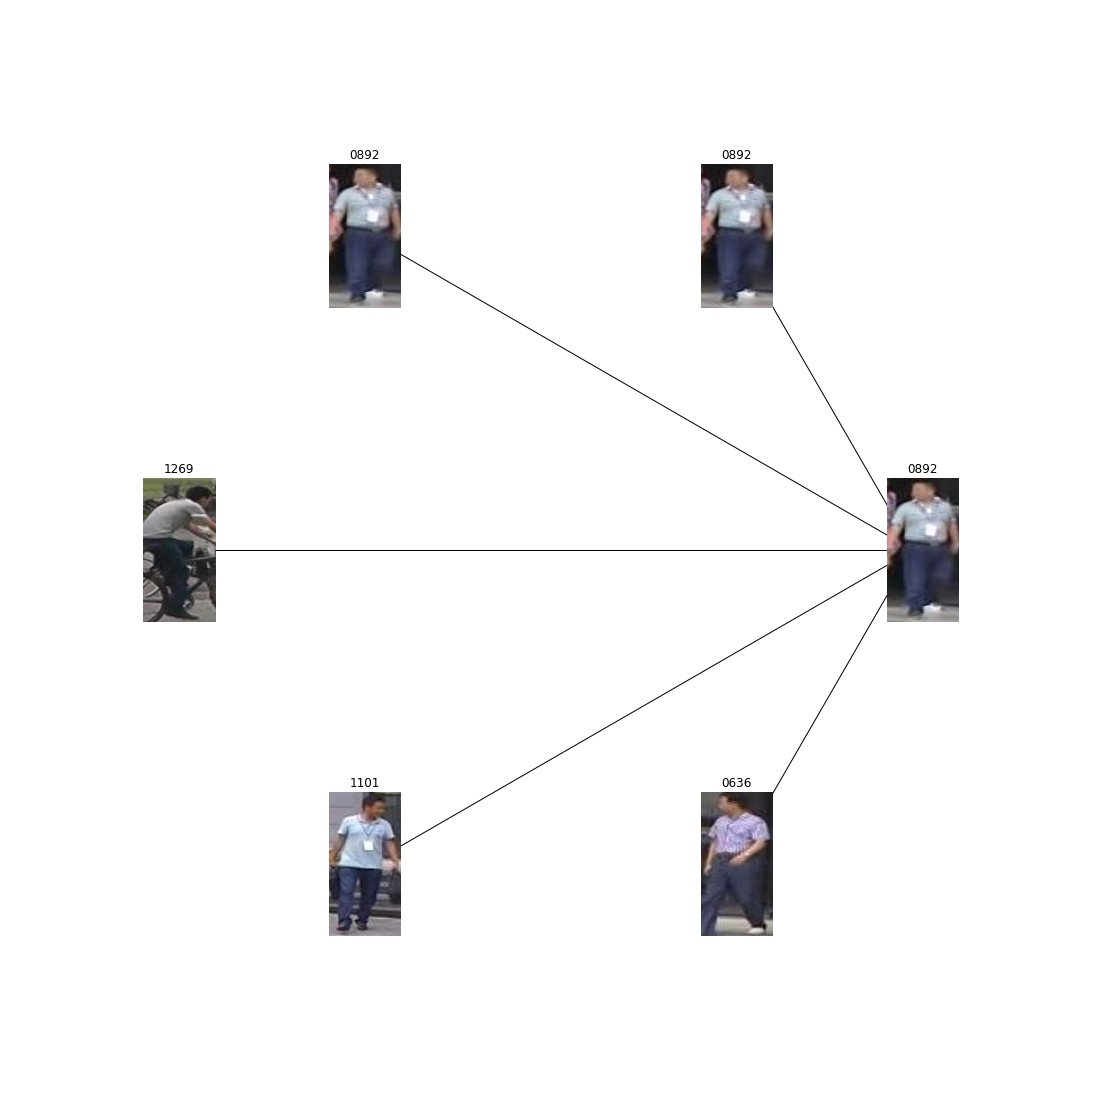

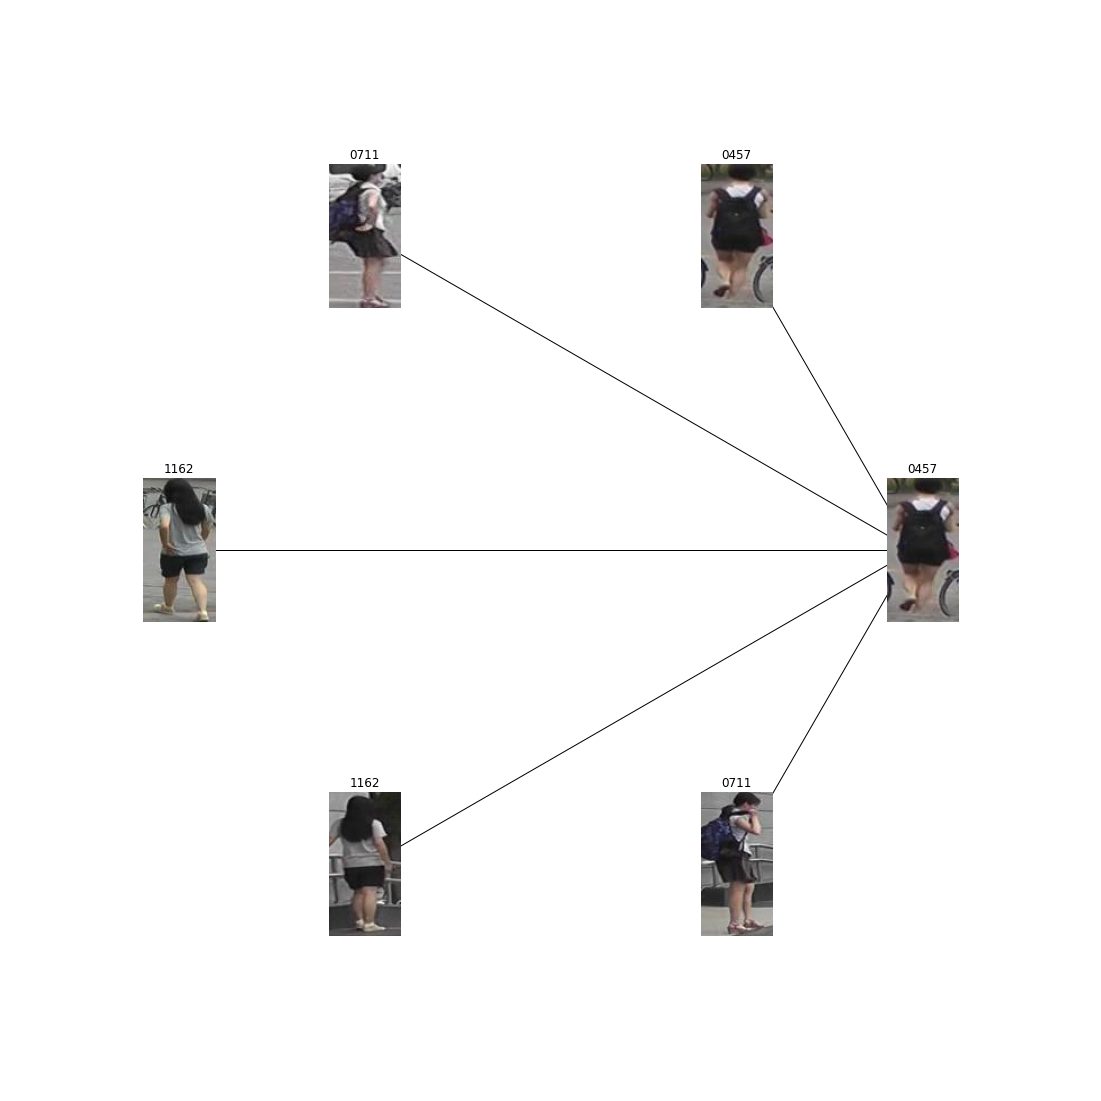

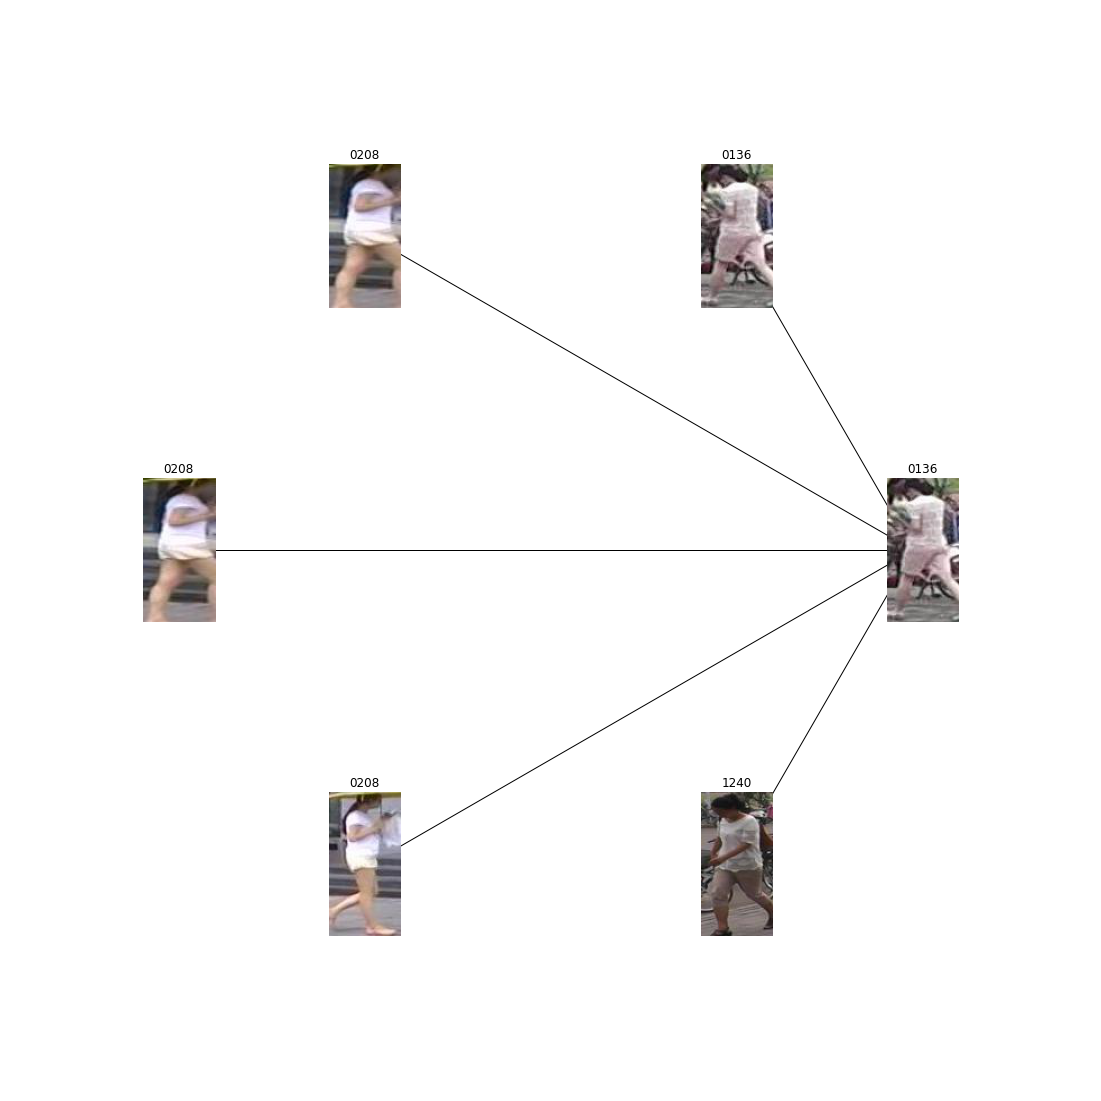

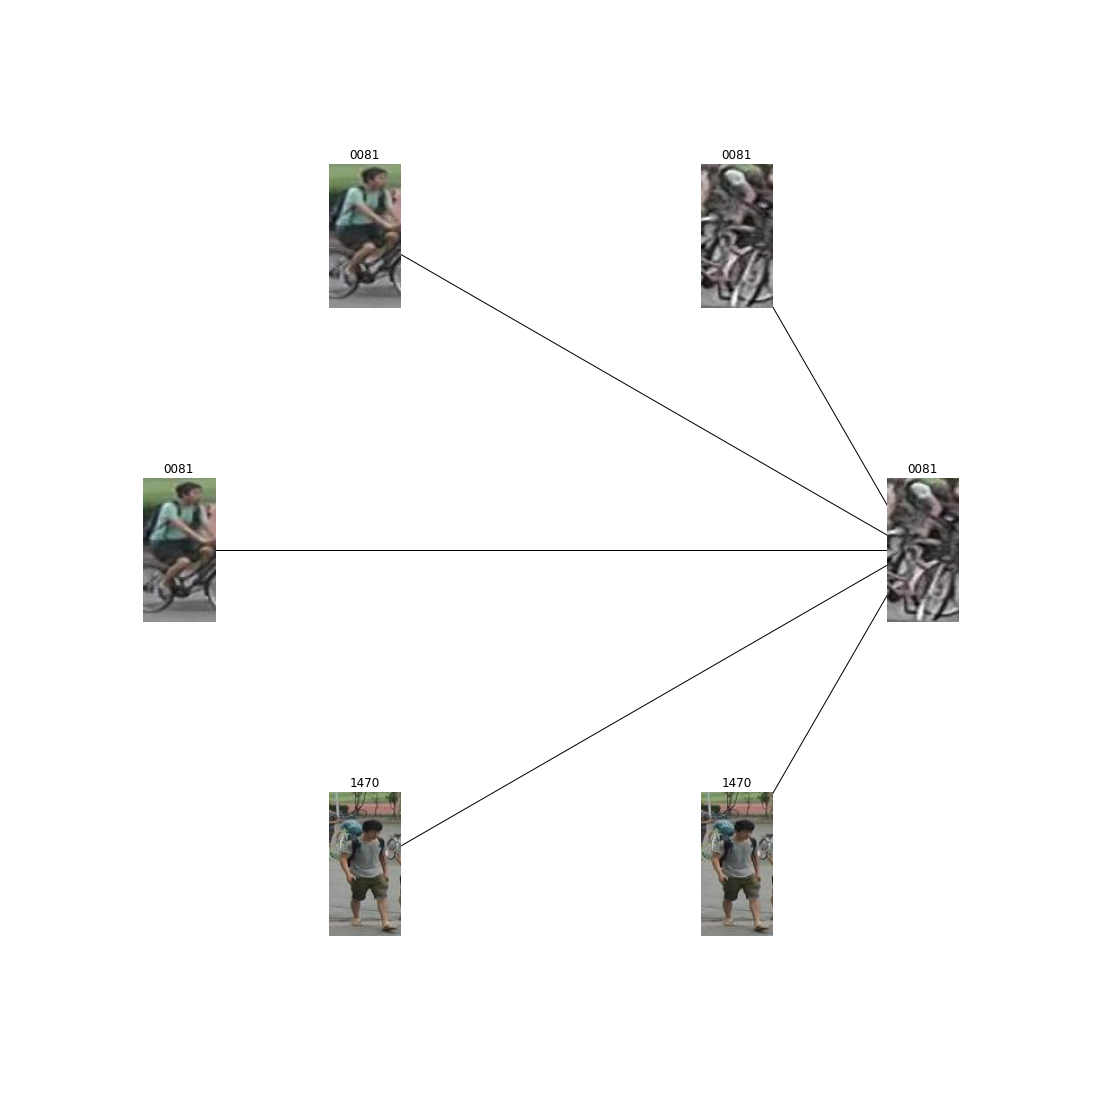

In [3]:
for i in range(5):
    
    idx = int(np.random.randint(low=0, high=len(df_enc), size=1))
    im_name = df_enc['Anchor'].iloc[idx]
    im_path = data_dir + im_name

    im = torch.from_numpy(io.imread(im_path)).permute(2, 0, 1) / 255.

    with torch.no_grad():
        im = im.to(device)
        fm = model(im.unsqueeze(0)).detach().cpu().numpy()

    fm_enc_arr = df_enc.iloc[:, 1:].to_numpy()
    qry_im_names = df_enc['Anchor']

    distances = []

    for i in range(fm_enc_arr.shape[0]):
        dist = euc_dist(fm, fm_enc_arr[i : i+1, :])
        distances = np.append(distances, dist)

    closest_idx = np.argsort(distances)
    plot_closest_imgs(qry_im_names, data_dir, im, im_path, closest_idx, distances, no_of_closest = 5);